## Python statistics essential training - 03_03_histograms

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

**Loading data files**

In [4]:
China_1965 = r'F:\Data Analysis\Springboard\Data Science Career Track\16. LinkedIn Learning\Exercise Files\chapter3\03_02\income-1965-china.csv'

china1965 = pd.read_csv(China_1965)
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


In [5]:
China_2015 = r'F:\Data Analysis\Springboard\Data Science Career Track\16. LinkedIn Learning\Exercise Files\chapter3\03_02\income-2015-china.csv'

china2015 = pd.read_csv(China_2015)
china2015.head()

,income,log10_income
0,4.499303,0.653145
1,13.727408,1.137589
2,7.075421,0.849752
3,4.667088,0.669046
4,6.456985,0.810030


In [6]:
USA_1965 = r'F:\Data Analysis\Springboard\Data Science Career Track\16. LinkedIn Learning\Exercise Files\chapter3\03_02\income-1965-usa.csv'

usa1965 = pd.read_csv(USA_1965)
usa1965.head()

,income,log10_income
0,21.363833,1.329679
1,30.604093,1.485780
2,50.373886,1.702205
3,59.968851,1.777926
4,21.271346,1.327795


In [7]:
USA_2015 = r'F:\Data Analysis\Springboard\Data Science Career Track\16. LinkedIn Learning\Exercise Files\chapter3\03_02\income-2015-usa.csv'

usa2015 = pd.read_csv(USA_2015)
usa2015.head()

,income,log10_income
0,72.550746,1.860642
1,47.333869,1.675172
2,65.866942,1.818668
3,93.093078,1.968917
4,15.194904,1.181698


**Box Plot**

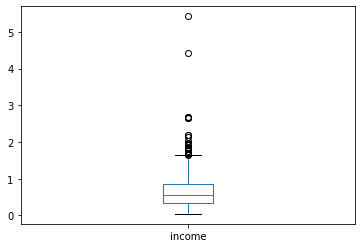

In [8]:
china1965.income.plot(kind='box')

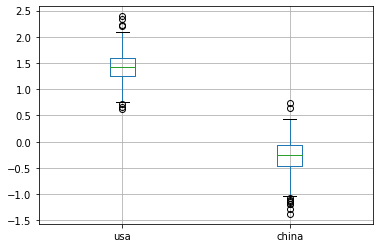

In [9]:
#Comparing china and usa
pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income}).boxplot()

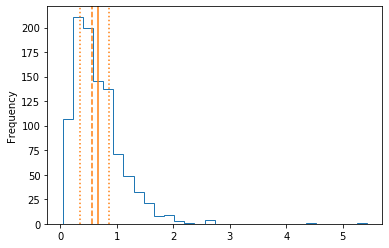

In [10]:
#Histogram
china1965.income.plot(kind='hist',histtype='step',bins=30)

plt.axvline(china1965.income.mean(),c='C1')
plt.axvline(china1965.income.median(),c='C1',linestyle='--')
plt.axvline(china1965.income.quantile(0.25),c='C1',linestyle=':')
plt.axvline(china1965.income.quantile(0.75),c='C1',linestyle=':')

(0, 3, 0.0, 1.2342999882944066)

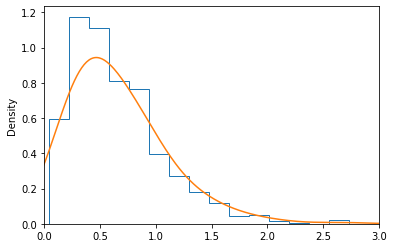

In [11]:
china1965.income.plot(kind='hist',histtype='step',bins=30,density=True)
china1965.income.plot.density(bw_method=0.5)

plt.axis(xmin=0,xmax=3)

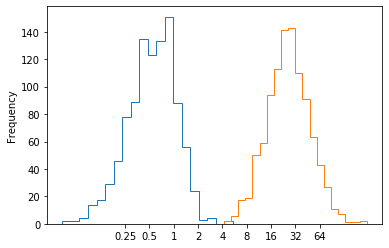

In [12]:
#Comparing two data
china1965.log10_income.plot.hist(histtype='step',bins=20)
usa1965.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
plt.xticks(np.log10(levels),levels);

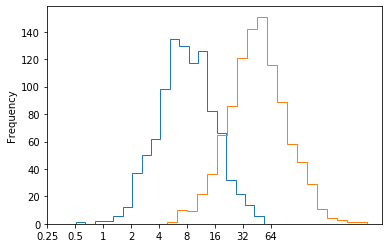

In [13]:
china2015.log10_income.plot.hist(histtype='step',bins=20)
usa2015.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
plt.xticks(np.log10(levels),levels);

**Loading the gapminder data**

In [14]:
filename= r'F:\Data Analysis\Springboard\Data Science Career Track\16. LinkedIn Learning\Exercise Files\chapter3\03_01\gapminder.csv'

gapminder = pd.read_csv(filename)


In [15]:
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)

In [16]:
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [17]:
china_pop2015, usa_pop2015

(1376048943.0, 321773631.0)

In [18]:
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

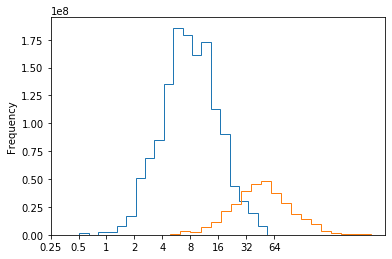

In [19]:
china2015.log10_income.plot.hist(histtype='step',bins=20,weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step',bins=20,weights=usa2015.weight)

levels = [0.25,0.5,1,2,4,8,16,32,64]
plt.xticks(np.log10(levels),levels);